###Importing Modules

In [1]:
# from sklearn.metrics import log_loss
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.ensemble import RandomForestClassifier
# from pprint import pprint
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import train_test_split
# from sklearn import ensemble
# from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
# import warnings
# from mlxtend.classifier import StackingClassifier
# import missingno as msno
# from sklearn.ensemble import VotingClassifier
# import shap
# shap.initjs()
# import lime
# from lime import lime_tabular
# warnings.simplefilter('ignore')
import os
plt.style.use('seaborn-whitegrid')
# plt.style.use('dark_background')

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<ipython-input-1-ef1aaf2f7497>:29: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


###Reading Data

In [2]:
insurance_df = pd.read_csv('train.csv', index_col='Id')
insurance_df.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
Id,,,,,,,,,,,,,,,,,,,,,
2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,8
5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,4
6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,8
7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,8
8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,8


###shape

In [3]:
insurance_df.shape

(59381, 127)

###Distribution of Target Variable

In [4]:
insurance_df['Response'].value_counts()

Response
8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: count, dtype: int64

Class imbalance can be seen here. Also there 8 categories, lets combine them to 3 categories

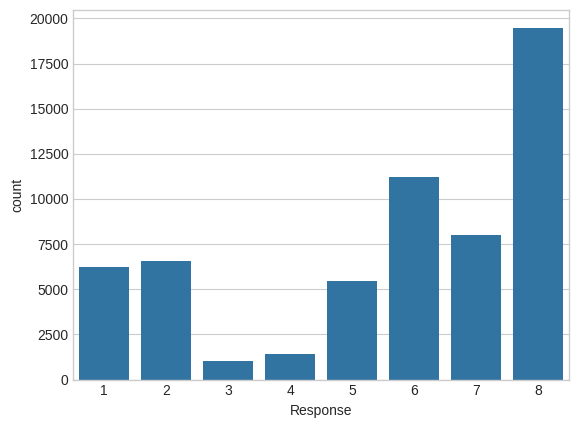

In [5]:
sns.countplot(x=insurance_df['Response']);

###Processing Target Variable

In [6]:
insurance_df['Modified_Response']  = insurance_df['Response'].apply(lambda x : 0 if x<=7 and x>=0 else (1 if x==8 else -1))

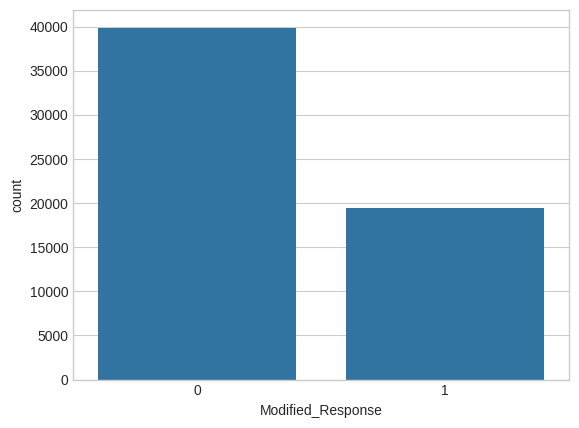

In [7]:
sns.countplot(x= insurance_df['Modified_Response']);

###Removing old target variable

In [8]:
# Dropping old response columns
insurance_df.drop('Response',axis = 1, inplace=True)

###Making categorical and numerical columns list

In [9]:
# Making lists with categorical and numerical features.
categorical =  [col for col in insurance_df.columns if insurance_df[col].dtype =='object']

numerical = categorical =  [col for col in insurance_df.columns if insurance_df[col].dtype !='object']

###Visualizations On Categorical Features

In [10]:
for col in categorical:
    counts = insurance_df[col].value_counts().sort_index()
    if len(counts) > 10 and len(counts) < 50 :
      fig = plt.figure(figsize=(30, 10))
    elif len(counts) >50 :
      continue
    else:
      fig = plt.figure(figsize=(9, 6))

<ipython-input-10-0bee0e79e3cc>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(9, 6))


<Figure size 900x600 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<ipython-input-11-44dc72eb8577>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_df['Employment_Info_1'], ax=axes[0])


<Axes: ylabel='Employment_Info_1'>

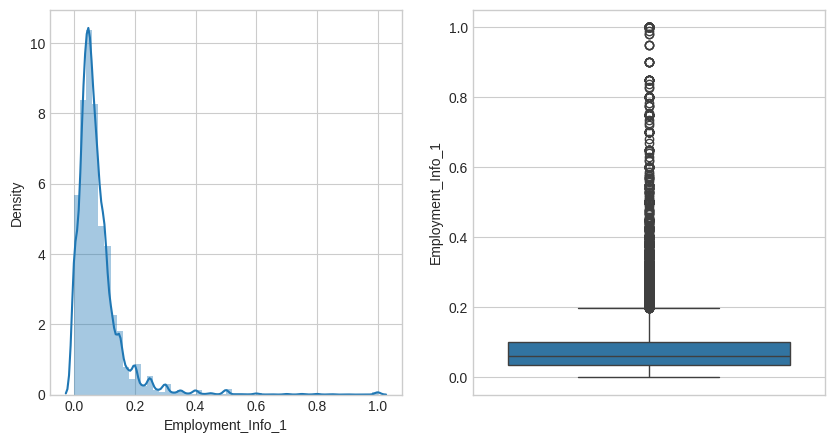

In [11]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(insurance_df['Employment_Info_1'], ax=axes[0])
sns.boxplot(insurance_df['Employment_Info_1'], ax=axes[1])

In [12]:
pip install dash plotly pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 23.1 MB/s eta 0:00:00


In [13]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Load the Prudential insurance dataset
df = pd.read_csv('train.csv')  # Update the filename with your dataset

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Prudential Insurance Data Dashboard"),
    dcc.Dropdown(
        id='dropdown-variable',
        options=[{'label': i, 'value': i} for i in df.columns],
        value='BMI'  # Default variable to display
    ),
    dcc.Graph(id='main-graph'),
])

# Define callback to update the graph based on the dropdown selection
@app.callback(
    Output('main-graph', 'figure'),
    [Input('dropdown-variable', 'value')]
)
def update_graph(selected_variable):
    fig = px.histogram(df, x=selected_variable, color='Response',
                       marginal='box', barmode='overlay',
                       title=f'Distribution of {selected_variable} by Response')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

###Checking Correlation For Features greater than .8

In [14]:
import pandas as pd

# Assuming you have already loaded your insurance dataset into insurance_df

# Select only numeric columns
numeric_columns = insurance_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = numeric_columns.corr()

# Filter the correlation matrix for values greater than or equal to 0.8
corr_greater_than_80 = corr[corr >= 0.8]

print(corr_greater_than_80)


                    Product_Info_1  Product_Info_3  Product_Info_4  \
Product_Info_1                 1.0             NaN             NaN   
Product_Info_3                 NaN             1.0             NaN   
Product_Info_4                 NaN             NaN             1.0   
Product_Info_5                 NaN             NaN             NaN   
Product_Info_6                 NaN             NaN             NaN   
...                            ...             ...             ...   
Medical_Keyword_45             NaN             NaN             NaN   
Medical_Keyword_46             NaN             NaN             NaN   
Medical_Keyword_47             NaN             NaN             NaN   
Medical_Keyword_48             NaN             NaN             NaN   
Modified_Response              NaN             NaN             NaN   

                    Product_Info_5  Product_Info_6  Product_Info_7  Ins_Age  \
Product_Info_1                 NaN             NaN             NaN      NaN   
P

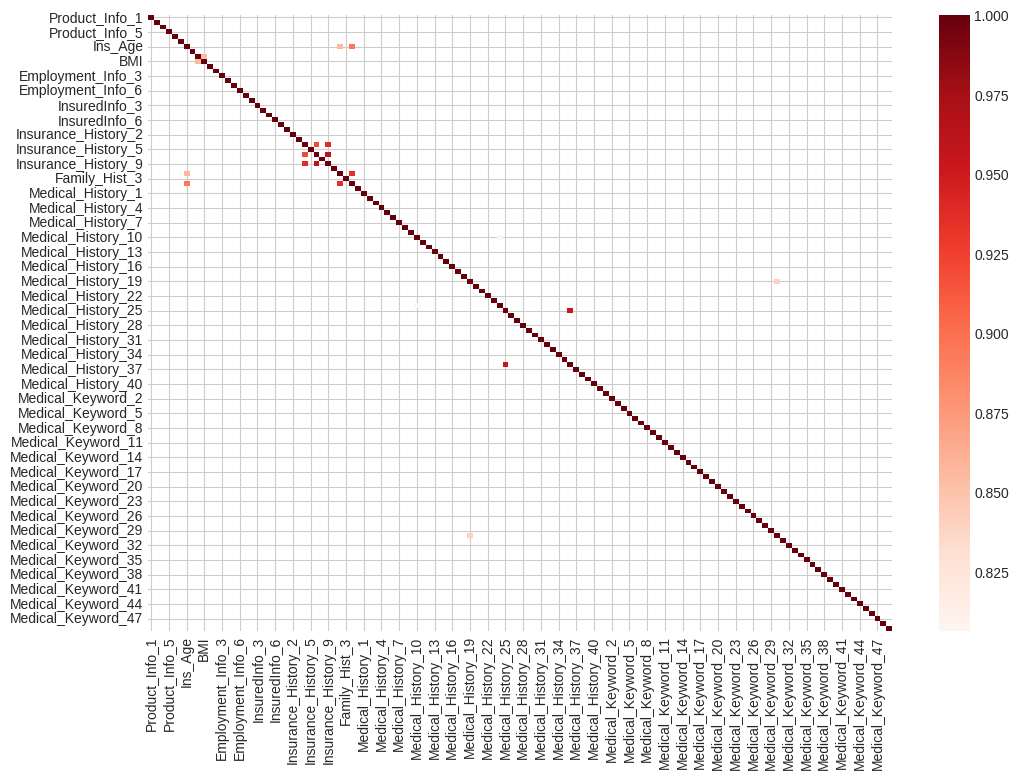

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_greater_than_80, cmap="Reds");

In [16]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

###missing values

<ipython-input-17-639e2f3ad610>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




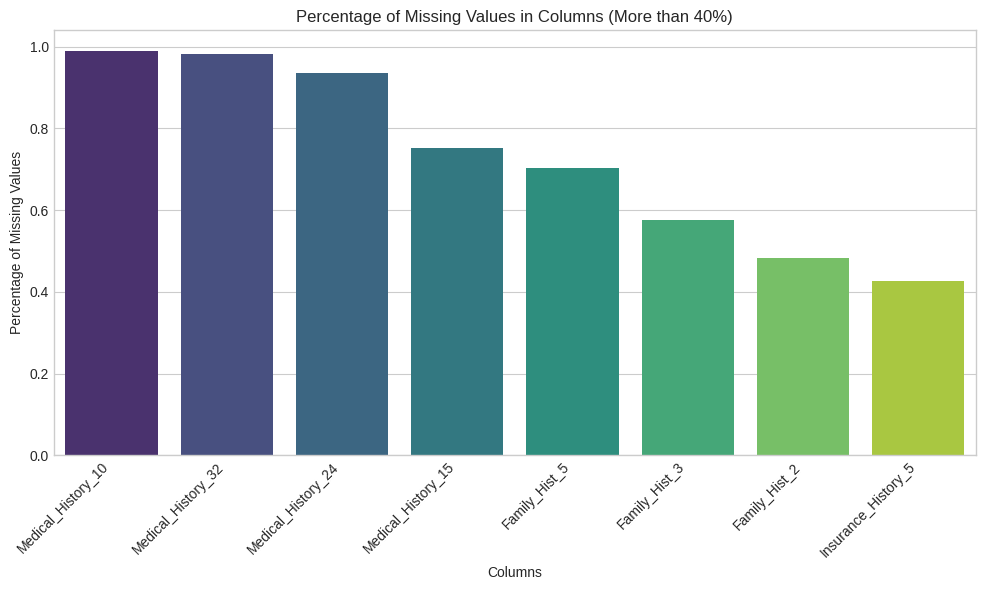

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of missing values for each column
missing_val_count_by_column = insurance_df.isnull().sum() / len(insurance_df)

# Filter columns with missing values greater than 40%
missing_val_greater_than_40 = missing_val_count_by_column[missing_val_count_by_column > 0.4].sort_values(ascending=False)

# Plot the missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_val_greater_than_40.index, y=missing_val_greater_than_40.values, palette="viridis")
plt.title('Percentage of Missing Values in Columns (More than 40%)')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [18]:
pip install missingno


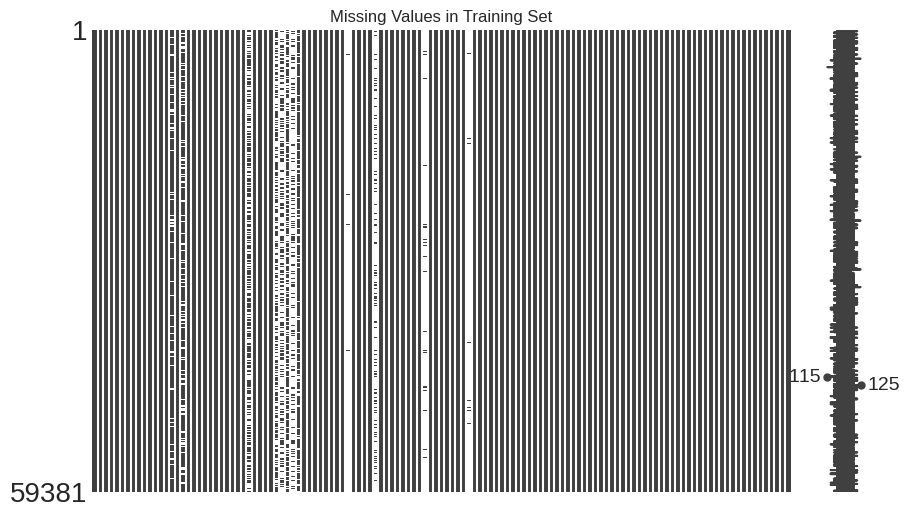

In [19]:
import missingno as msno

# Assuming you have already loaded your insurance dataset into insurance_df

# Visualize missing values in the training set
msno.matrix(insurance_df, figsize=(10, 6))
plt.title('Missing Values in Training Set')
plt.show()


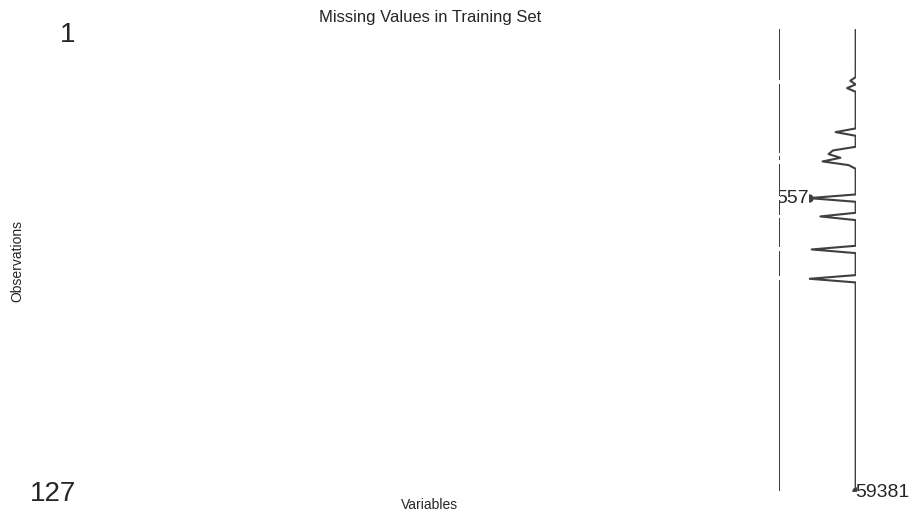

In [20]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missing values in the training set with observations on the x-axis and variables on the y-axis
msno.matrix(insurance_df.T, figsize=(10, 6))  # Transpose the DataFrame to switch x and y axis
plt.title('Missing Values in Training Set')
plt.xlabel('Variables')
plt.ylabel('Observations')
plt.show()


In [21]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

###Null Value Check

In [22]:

missing_val_count_by_column = insurance_df.isnull().sum()/len(insurance_df)

print(missing_val_count_by_column[missing_val_count_by_column > 0.4].sort_values(ascending=False))

Medical_History_10     0.990620
Medical_History_32     0.981358
Medical_History_24     0.935990
Medical_History_15     0.751015
Family_Hist_5          0.704114
Family_Hist_3          0.576632
Family_Hist_2          0.482579
Insurance_History_5    0.427679
dtype: float64


In [23]:
insurance_df = insurance_df.dropna(thresh=insurance_df.shape[0]*0.4,axis=1)

In [24]:
# Does not contain important information
insurance_df.drop('Product_Info_2',axis=1,inplace=True)

###X and Y split

In [25]:
# Data for all the independent variables
X = insurance_df.drop(labels='Modified_Response',axis=1)

# Data for the dependent variable
Y = insurance_df['Modified_Response']

###Filling Remaining Missing Values

In [26]:
X = X.fillna(X.mean())

###Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

# Assuming X and Y are your feature and target variables respectively
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)


###Shapes of Train and Test Data

In [29]:
# Check the shape of train dataset
print(X_train.shape,Y_train.shape)

# Check the shape of test dataset
print(X_test.shape, Y_test.shape)

(44535, 120) (44535,)
(14846, 120) (14846,)


In [30]:
# Utility Functions
def check_scores(model, X_train, X_test ):
  # Making predictions on train and test data

  train_class_preds = model.predict(X_train)
  test_class_preds = model.predict(X_test)


  # Get the probabilities on train and test
  train_preds = model.predict_proba(X_train)[:,1]
  test_preds = model.predict_proba(X_test)[:,1]


  # Calculating accuracy on train and test
  train_accuracy = accuracy_score(Y_train,train_class_preds)
  test_accuracy = accuracy_score(Y_test,test_class_preds)

  print("The accuracy on train dataset is", train_accuracy)
  print("The accuracy on test dataset is", test_accuracy)
  print()
  # Get the confusion matrices for train and test
  train_cm = confusion_matrix(Y_train,train_class_preds)
  test_cm = confusion_matrix(Y_test,test_class_preds )

  print('Train confusion matrix:')
  print( train_cm)
  print()
  print('Test confusion matrix:')
  print(test_cm)
  print()

  # Get the roc_auc score for train and test dataset
  train_auc = roc_auc_score(Y_train,train_preds)
  test_auc = roc_auc_score(Y_test,test_preds)

  print('ROC on train data:', train_auc)
  print('ROC on test data:', test_auc)

  # Fscore, precision and recall on test data
  f1 = f1_score(Y_test, test_class_preds)
  precision = precision_score(Y_test, test_class_preds)
  recall = recall_score(Y_test, test_class_preds)


  #R2 score on train and test data
  train_log = log_loss(Y_train,train_preds)
  test_log = log_loss(Y_test, test_preds)

  print()
  print('Train log loss:', train_log)
  print('Test log loss:', test_log)
  print()
  print("F score is:",f1 )
  print("Precision is:",precision)
  print("Recall is:", recall)
  return model, train_auc, test_auc, train_accuracy, test_accuracy,f1, precision,recall, train_log, test_log


def check_importance(model, X_train):
  #Checking importance of features
  importances = model.feature_importances_

  #List of columns and their importances
  importance_dict = {'Feature' : list(X_train.columns),
                    'Feature Importance' : importances}
  #Creating a dataframe
  importance_df = pd.DataFrame(importance_dict)

  #Rounding it off to 2 digits as we might get exponential numbers
  importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
  return importance_df.sort_values(by=['Feature Importance'],ascending=False)

def grid_search(model, parameters, X_train, Y_train):
  #Doing a grid
  grid = GridSearchCV(estimator=model,
                       param_grid = parameters,
                       cv = 2, verbose=2, scoring='roc_auc')
  #Fitting the grid
  grid.fit(X_train,Y_train)
  print()
  print()
  # Best model found using grid search
  optimal_model = grid.best_estimator_
  print('Best parameters are: ')
  pprint( grid.best_params_)

  return optimal_model



# This function will show how a feature is pushing towards 0 or 1
def interpret_with_lime(model, X_test):
  # New data
  interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification')


  exp = interpretor.explain_instance(
      data_row=X_test.iloc[10],
      predict_fn=model.predict_proba
  )

  exp.show_in_notebook(show_table=True)

# This gives feature importance
def plot_feature_importance(model, X_train):
  # PLotting features vs their importance factors
  fig = plt.figure(figsize = (15, 8))

  # Extracting importance values
  values =check_importance(model, X_train)[check_importance(model, X_train)['Feature Importance']>0]['Feature Importance'].values


  # Extracting importance features
  features = check_importance(model, X_train)[check_importance(model, X_train)['Feature Importance']>0]['Feature'].values

  plt.bar(features, values, color ='blue',
          width = 0.4)
  plt.xticks( rotation='vertical')
  plt.show()

###multi linear regression

In [65]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from pprint import pprint

# Define function to calculate MAE and RMSE
def calc_metrics(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    rmse = mean_squared_error(true_values, predicted_values, squared=False)
    return mae, rmse

# Create the Linear Regression estimator
linear_reg = LinearRegression()

# Create the pipeline with Factor Analysis for feature selection
pipeline = Pipeline(steps=[
    ('factor_analysis', FactorAnalysis()),
    ('estimator', linear_reg)
])

# Define the number of components for Factor Analysis
n_components = [5, 10]  # Adjust the number of components as needed

# Hyperparameter Grid for Linear Regression and Factor Analysis
param_grid = {
    'factor_analysis__n_components': n_components,
    'estimator__fit_intercept': [True, False]
}

# Finding the best model with reduced parameters and folds
optimal_model = GridSearchCV(pipeline, param_grid, scoring='neg_mean_absolute_error', cv=3, error_score='raise')
optimal_model.fit(X_train, Y_train)

# Best parameters and best score
print("Best Parameters: ", optimal_model.best_params_)
print("Best Mean Absolute Error: ", -optimal_model.best_score_)

# Predictions
Y_pred = optimal_model.predict(X_test)

# Calculate MAE and RMSE
mae, rmse = calc_metrics(Y_test, Y_pred)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)


Best Parameters:  {'estimator__fit_intercept': True, 'factor_analysis__n_components': 10}
Best Mean Absolute Error:  0.3597582857447597
Mean Absolute Error: 0.3614653685941673
Root Mean Squared Error: 0.4131362806092218


###RANDOM FOREST

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.decomposition import FactorAnalysis
from sklearn.pipeline import Pipeline
from pprint import pprint

# Define function to calculate MAE and RMSE
def calc_metrics(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    rmse = mean_squared_error(true_values, predicted_values, squared=False)
    return mae, rmse

# Reduce the search space for hyperparameters
rf_parameters = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Define the number of components for Factor Analysis
n_components = [5, 10, 15]  # Adjust the number of components as needed

# Print the hyperparameter grids
pprint(rf_parameters)

# Create the Factor Analysis transformer
factor_analysis = FactorAnalysis()

# Create the Random Forest estimator
random_forest = RandomForestRegressor()

# Create the pipeline
pipeline = Pipeline(steps=[
    ('factor_analysis', factor_analysis),
    ('estimator', random_forest)
])

# Combine the hyperparameter grids
param_distributions = {
    'factor_analysis__n_components': n_components,
    'estimator__n_estimators': [50, 100],
    'estimator__max_depth': [None, 10],
    'estimator__min_samples_split': [2, 5],
    'estimator__min_samples_leaf': [1, 2]
}

# Finding the best model using RandomizedSearchCV with reduced iterations and CV folds
optimal_model = RandomizedSearchCV(pipeline, param_distributions, n_iter=5, scoring='neg_mean_absolute_error', cv=3, error_score='raise', n_jobs=-1)
optimal_model.fit(X_train, Y_train)

# Best parameters and best score
print("Best Parameters: ", optimal_model.best_params_)
print("Best Mean Absolute Error: ", -optimal_model.best_score_)

# Predictions
Y_pred = optimal_model.predict(X_test)

# Calculate MAE and RMSE
mae, rmse = calc_metrics(Y_test, Y_pred)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)


{'max_depth': [None, 10],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 5],
 'n_estimators': [50, 100]}
Best Parameters:  {'factor_analysis__n_components': 15, 'estimator__n_estimators': 50, 'estimator__min_samples_split': 5, 'estimator__min_samples_leaf': 2, 'estimator__max_depth': None}
Best Mean Absolute Error:  0.3042266328571818
Mean Absolute Error: 0.3083928035381626
Root Mean Squared Error: 0.3975964040084206


###ANN

In [62]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.decomposition import FactorAnalysis
from sklearn.pipeline import Pipeline
from pprint import pprint

# Define function to calculate MAE and RMSE
def calc_metrics(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    rmse = mean_squared_error(true_values, predicted_values, squared=False)
    return mae, rmse

# Define the number of principal components
n_components = [0.8, 0.9]  # Reduce components for faster computation

# Hyperparameter Grid for Factor Analysis
fa_parameters = {
    'n_components': [2, 3]  # Adjust the number of components as needed
}

# Hyperparameter Grid for MLPRegressor
mlp_parameters = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001],
}

# Print the hyperparameter grids
pprint(fa_parameters)
pprint(mlp_parameters)

# Create the Factor Analysis transformer
fa = FactorAnalysis()

# Create the MLPRegressor estimator
mlp_regressor = MLPRegressor(max_iter=1000)  # Increase max_iter for early stopping

# Create the pipeline
pipeline = Pipeline(steps=[
    ('factor_analysis', fa),
    ('estimator', mlp_regressor)
])

# Combine the hyperparameter grids
param_distributions = {
    'factor_analysis__n_components': fa_parameters['n_components'],
    'estimator__hidden_layer_sizes': [(50,), (100,)],
    'estimator__activation': ['relu', 'tanh'],
    'estimator__alpha': [0.0001, 0.001],
}

# Finding the best model using RandomizedSearchCV with reduced iterations
optimal_model = RandomizedSearchCV(pipeline, param_distributions, n_iter=5, scoring='neg_mean_absolute_error', cv=3, error_score='raise', n_jobs=-1)
optimal_model.fit(X_train, Y_train)

# Best parameters and best score
print("Best Parameters: ", optimal_model.best_params_)
print("Best Mean Absolute Error: ", -optimal_model.best_score_)

# Predictions
Y_pred = optimal_model.predict(X_test)

# Calculate MAE and RMSE
mae, rmse = calc_metrics(Y_test, Y_pred)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)


{'n_components': [2, 3]}
{'activation': ['relu', 'tanh'],
 'alpha': [0.0001, 0.001],
 'hidden_layer_sizes': [(50,), (100,)]}
Best Parameters:  {'factor_analysis__n_components': 3, 'estimator__hidden_layer_sizes': (100,), 'estimator__alpha': 0.001, 'estimator__activation': 'relu'}
Best Mean Absolute Error:  0.36870358938441444
Mean Absolute Error: 0.3666071876269988
Root Mean Squared Error: 0.4310504104946933


###COMPARING MAE RMSE

In [53]:
pip install tabulate


In [69]:
from tabulate import tabulate

# Define the results in a list of lists
results = [
    ["ANN",  0.3666071876269988, 0.4310504104946933],
    ["Random Forest", 0.3083928035381626,0.3975964040084206],
    ["MLPRegressor", 0.3614653685941673,0.4131362806092218]
]

# Print the results in tabular format
print(tabulate(results, headers=["Model", "Mean Absolute Error", "Root Mean Squared Error"], tablefmt="pretty"))


+---------------+---------------------+-------------------------+
|     Model     | Mean Absolute Error | Root Mean Squared Error |
+---------------+---------------------+-------------------------+
|      ANN      | 0.3666071876269988  |   0.4310504104946933    |
| Random Forest | 0.3083928035381626  |   0.3975964040084206    |
| MLPRegressor  | 0.3614653685941673  |   0.4131362806092218    |
+---------------+---------------------+-------------------------+
